In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset (change this to your dataset location)
DATASET_PATH = r"C:\Users\manic\OneDrive\Desktop\Cancer detection\lung_colon_image_set\lung_image_sets"

# Image settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',         # Stop when validation loss stops improving
    patience=10,                # Wait for 10 epochs before stopping
    restore_best_weights=True   # Revert to best weights
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',            # Save the best model to this file
    monitor='val_accuracy',     # Monitor validation accuracy
    save_best_only=True,        # Save only the best model
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',         # Reduce LR when validation loss stops improving
    factor=0.5,                 # Reduce LR by half
    patience=5,                 # Wait for 5 epochs before reducing
    min_lr=1e-6                 # Set a minimum learning rate
)

# Compile the Model with Additional Metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy', 
             tf.keras.metrics.Precision(name='precision'), 
             tf.keras.metrics.Recall(name='recall')]
)

# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


KeyboardInterrupt: 

In [3]:
# Data Augmentation & Normalization
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=20,       # Random rotations
    width_shift_range=0.2,   
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2     # 80% Train, 20% Validation
)

# Load Training Data
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


Class Labels: {'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}


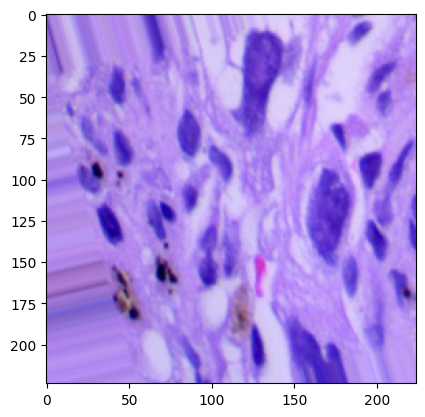

In [6]:
# Check class labels
print("Class Labels:", train_data.class_indices)

# Display a sample image
sample_image, sample_label = next(train_data)
plt.imshow(sample_image[0])
plt.show()


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [8]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 Output Classes: ACA, SCC, Normal
])

c:\Users\manic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

In [11]:
# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1342s 4s/step - accuracy: 0.8139 - loss: 0.4162 - val_accuracy: 0.8780 - val_loss: 0.2833
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 871s 2s/step - accuracy: 0.8704 - loss: 0.3132 - val_accuracy: 0.9063 - val_loss: 0.2197
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 324s 864ms/step - accuracy: 0.8857 - loss: 0.2774 - val_accuracy: 0.9120 - val_loss: 0.2068
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 306s 816ms/step - accuracy: 0.8905 - loss: 0.2665 - val_accuracy: 0.9087 - val_loss: 0.2144
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 309s 823ms/step - accuracy: 0.8963 - loss: 0.2478 - val_accuracy: 0.9160 - val_loss: 0.1921


In [12]:
# Save the Trained Model
model.save("lung_cancer_model.h5")

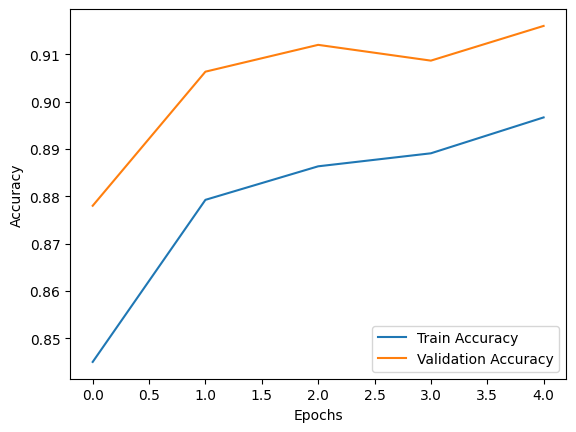

In [13]:
# Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()